# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [69]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("./Data/01. CCTV_in_Seoul.csv")
data

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [8]:
data.columns[0]

'기관명'

### **엑셀파일 읽기 - 서울시 인구현황**

In [11]:
data.rename(columns={data.columns[0] : '구별'},inplace=True)
data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [73]:
pop_data = pd.read_excel('./Data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_data.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [74]:
pop_data.rename(columns={pop_data.columns[0] : '구별', 
                          pop_data.columns[1] : '인구수', 
                          pop_data.columns[2] : '한국인', 
                          pop_data.columns[3] : '외국인', 
                          pop_data.columns[4] : '고령자'}, inplace=True)
pop_data.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## Pandas 기초

In [22]:
s = pd.Series([1, 3, 4, np.nan, 6, 9])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    9.0
dtype: float64

In [24]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df = pd.DataFrame(np.random.randn(6,4), index = dates,
                 columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271
2013-01-04,1.261642,-0.356528,-1.022576,0.068053
2013-01-05,-0.420509,0.889082,0.807225,-2.127664
2013-01-06,0.041089,-0.059312,-1.032210,0.311270


In [29]:
df.head()

,A,B,C,D
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271
2013-01-04,1.261642,-0.356528,-1.022576,0.068053
2013-01-05,-0.420509,0.889082,0.807225,-2.127664


In [30]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.237213,-0.158997,-0.227595,-0.895784
std,0.629325,0.769316,1.059781,0.924626
min,-0.420509,-1.462026,-1.180712,-2.127664
25%,-0.135195,-0.303236,-1.029802,-1.358796
50%,0.023658,-0.101337,-0.633716,-1.103030
75%,0.548147,0.118797,0.544205,-0.206908
max,1.261642,0.889082,1.307560,0.311270


In [33]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,-0.420509,0.889082,0.807225,-2.127664
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271
2013-01-06,0.041089,-0.059312,-1.032210,0.311270
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-04,1.261642,-0.356528,-1.022576,0.068053
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789


In [34]:
df['A']

2013-01-01    0.717166
2013-01-02    0.006228
2013-01-03   -0.182336
2013-01-04    1.261642
2013-01-05   -0.420509
2013-01-06    0.041089
Freq: D, Name: A, dtype: float64

In [35]:
df[0:3]

,A,B,C,D
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271


In [36]:
df.loc[:,'A']

2013-01-01    0.717166
2013-01-02    0.006228
2013-01-03   -0.182336
2013-01-04    1.261642
2013-01-05   -0.420509
2013-01-06    0.041089
Freq: D, Name: A, dtype: float64

In [37]:
df.loc['20120102':'20130104',['A','B']]

,A,B
2013-01-01,0.717166,-0.143363
2013-01-02,0.006228,-1.462026
2013-01-03,-0.182336,0.178167
2013-01-04,1.261642,-0.356528


In [38]:
df.loc[dates[0],'A']

0.7171658434002368

In [39]:
df.iloc[3]

A    1.261642
B   -0.356528
C   -1.022576
D    0.068053
Name: 2013-01-04 00:00:00, dtype: float64

In [40]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.261642,-0.356528
2013-01-05,-0.420509,0.889082


In [41]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.006228,-1.180712
2013-01-03,-0.182336,-0.244857
2013-01-05,-0.420509,0.807225


In [42]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271


In [43]:
df

,A,B,C,D
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271
2013-01-04,1.261642,-0.356528,-1.022576,0.068053
2013-01-05,-0.420509,0.889082,0.807225,-2.127664
2013-01-06,0.041089,-0.059312,-1.032210,0.311270


In [44]:
df[df.A < 0]

,A,B,C,D
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271
2013-01-05,-0.420509,0.889082,0.807225,-2.127664


In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,0.717166,NaN,1.307560,NaN
2013-01-02,0.006228,NaN,NaN,NaN
2013-01-03,NaN,0.178167,NaN,NaN
2013-01-04,1.261642,NaN,NaN,0.068053
2013-01-05,NaN,0.889082,0.807225,NaN
2013-01-06,0.041089,NaN,NaN,0.311270


In [46]:
df2 = df.copy()

In [47]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.717166,-0.143363,1.307560,-1.420305,one
2013-01-02,0.006228,-1.462026,-1.180712,-1.031789,one
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271,two
2013-01-04,1.261642,-0.356528,-1.022576,0.068053,three
2013-01-05,-0.420509,0.889082,0.807225,-2.127664,four
2013-01-06,0.041089,-0.059312,-1.032210,0.311270,three


In [48]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [49]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.182336,0.178167,-0.244857,-1.174271,two
2013-01-05,-0.420509,0.889082,0.807225,-2.127664,four


In [50]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.717166,-0.143363,1.307560,-1.420305
2013-01-02,0.723393,-1.605389,0.126847,-2.452094
2013-01-03,0.541058,-1.427222,-0.118009,-3.626365
2013-01-04,1.802700,-1.783749,-1.140585,-3.558312
2013-01-05,1.382191,-0.894667,-0.333360,-5.685977
2013-01-06,1.423281,-0.953979,-1.365570,-5.374707


In [51]:
df.apply(lambda x: x.max() - x.min())

A    1.682151
B    2.351108
C    2.488272
D    2.438934
dtype: float64

### CCTV 데이터 파악하기

In [52]:
data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [53]:
data.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [54]:
data.sort_values(by='소계',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [57]:
data["최근증가율"] = ((data['2016년'] + data['2015년'] + \
                 data['2014년']) / data['2013년도 이전'] * 100).round(2)
data.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.92
9,도봉구,485,238,159,42,386,246.64
12,마포구,574,314,118,169,379,212.10
8,노원구,1265,542,57,451,516,188.93
1,강동구,773,379,99,155,377,166.49


## 서울시 인구 데이터 파악하기

In [76]:
pop_data.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [77]:
pop_data.drop(0,axis=0, inplace=True)
pop_data.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [78]:
pop_data['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [79]:
pop_data[pop_data['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [80]:
pop_data.drop([26],inplace=True)

In [81]:
pop_data['외국인비율'] = pop_data['외국인'] / pop_data['인구수'] * 100
pop_data['고령자비율'] = pop_data['고령자'] / pop_data['인구수'] * 100
pop_data.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [82]:
pop_data.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [83]:
pop_data.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [84]:
pop_data.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## Pandas 고급 두 DataFrame 병합

In [85]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [86]:
result = pd.concat([df1, df2, df3])        # 그냥 아래에 붙이기
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [87]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [88]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [89]:
result.index.get_level_values(0)


Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [90]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [92]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [93]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [94]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [95]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [96]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [97]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [98]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [99]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [100]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [101]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## CCTV 데이터와 인구 데이터 합치기

In [103]:
data_result = pd.merge(data, pop_data, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.49,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.20,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.79,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.29,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [104]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [105]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [106]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [107]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])   # 상관관계가 있는지

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

## 그래프 그리기 - matplotlib

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

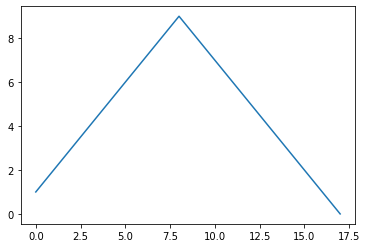

In [109]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [110]:
import numpy as np

t = np.arange(0,12,0.01)

y = np.sin(t)

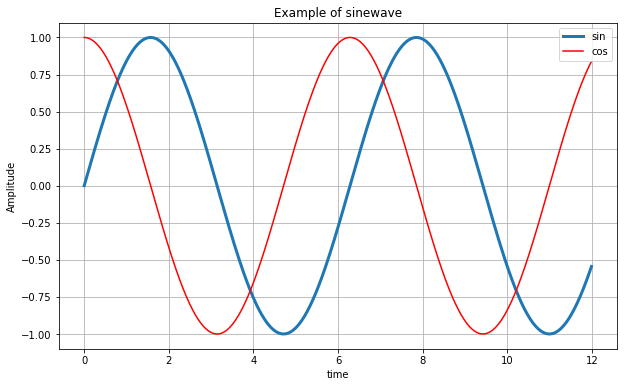

In [111]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

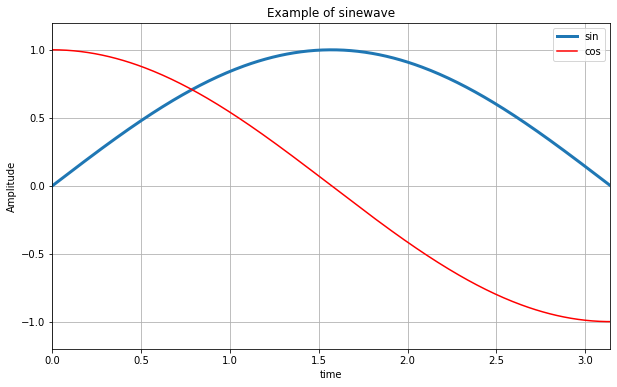

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

In [113]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

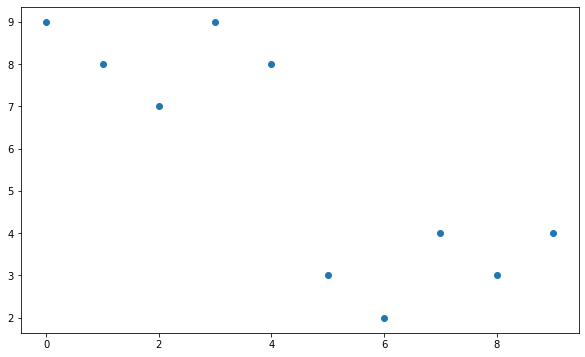

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

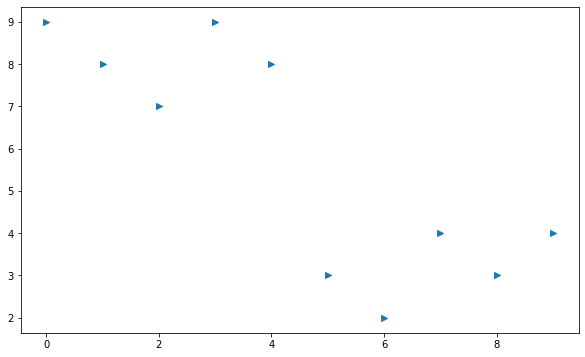

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

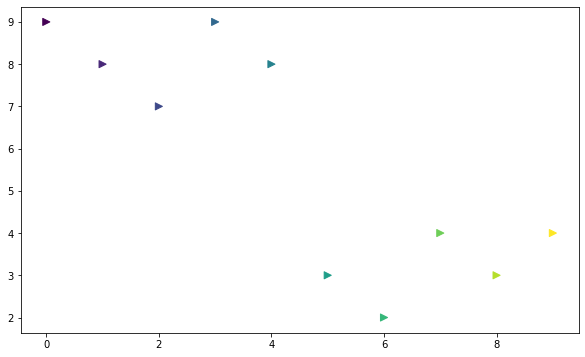

In [116]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

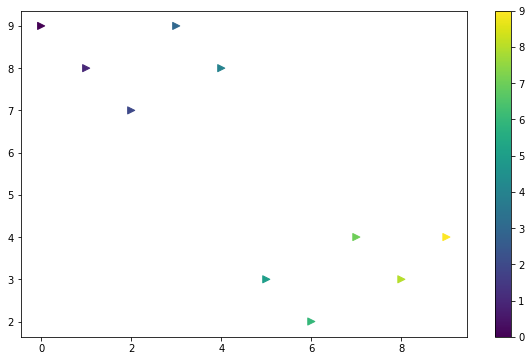

In [117]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

## CCTV와 인구현황 그래프로 분석하기

In [118]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [119]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


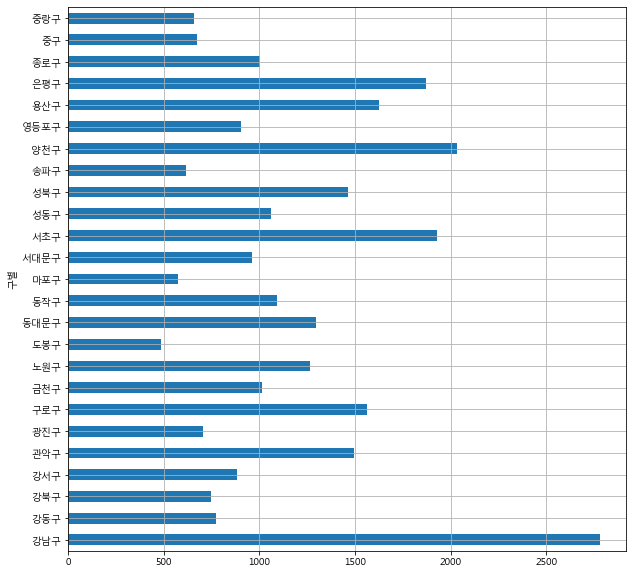

In [121]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

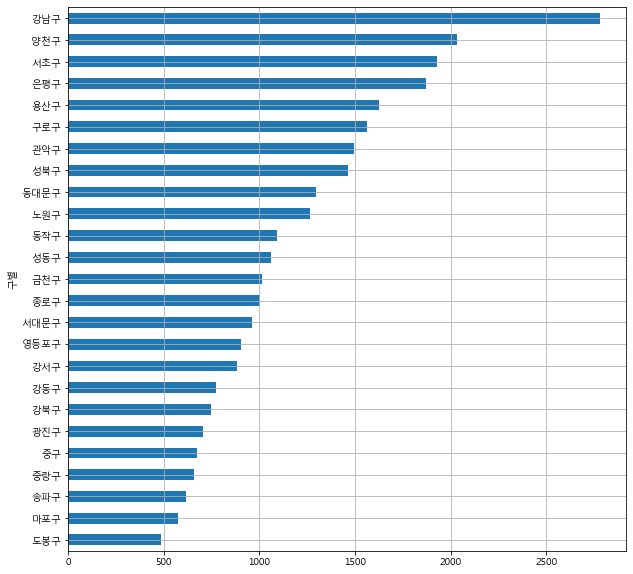

In [122]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

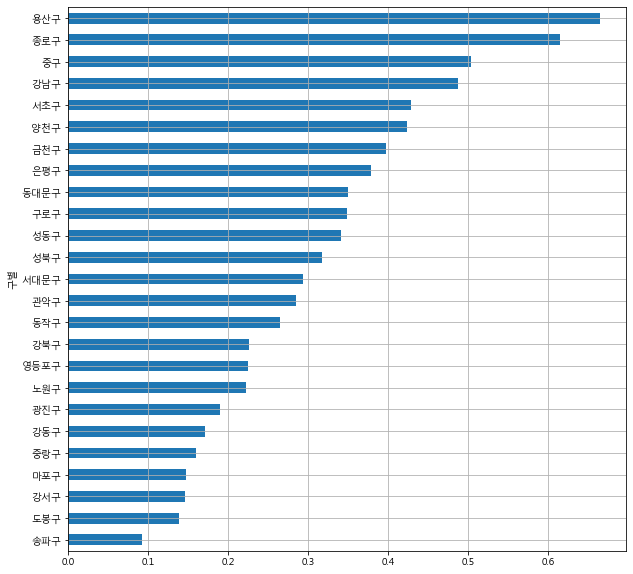

In [123]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

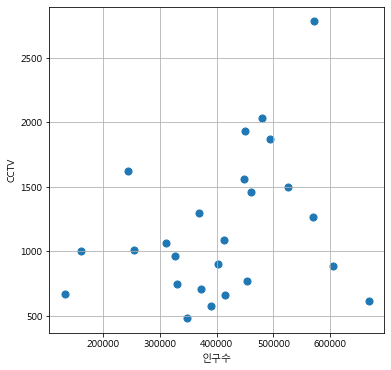

In [124]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [125]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [126]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

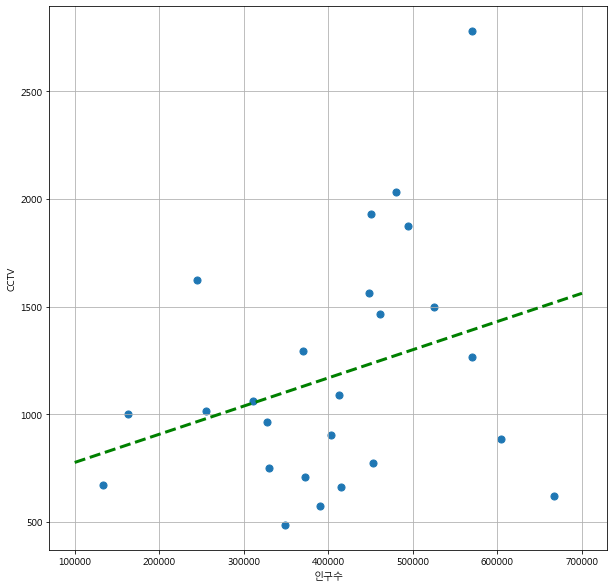

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 조금더 설득력있는 자료 만들기

In [128]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


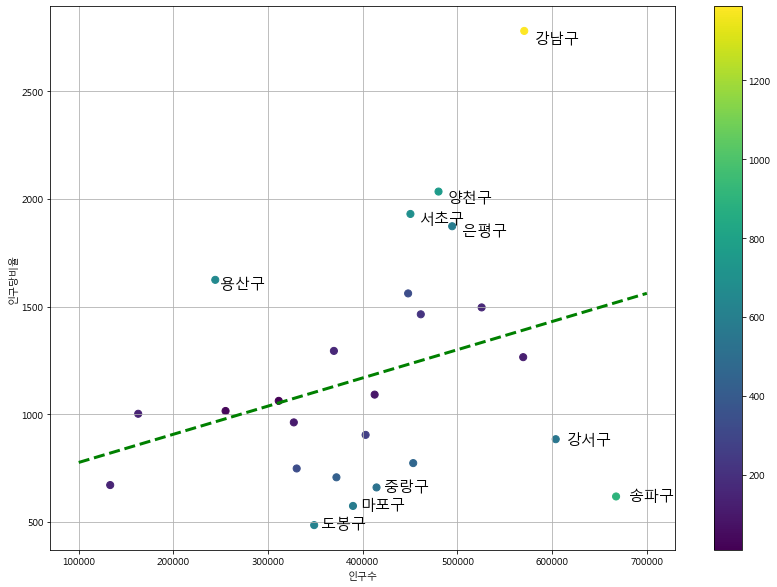

In [129]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

#### 결론
* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다